# Exploratory Data Analysis

## Housekeeping

In [ ]:
# Set working directory
import os
import re

try:
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/MyDrive/ds1_nhanes/')
except:
  from pathlib import Path
  if not re.search(r'ds1_nhanes$', str(os.getcwd())):
    os.chdir(Path(os.getcwd()).parent)

print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/ds1_nhanes


In [ ]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Preprocessing tools, scaling, pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Load dataset
df = pd.read_csv('data/clean/nhanes_2017_2023_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19386 entries, 0 to 19385
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       19386 non-null  int64  
 1   weight_2d                  19386 non-null  float64
 2   grams                      19386 non-null  float64
 3   f_total_(cup_eq)           19386 non-null  float64
 4   f_citmlb_(cup_eq)          19386 non-null  float64
 5   f_other_(cup_eq)           19386 non-null  float64
 6   f_juice_(cup_eq)           19386 non-null  float64
 7   v_total_(cup_eq)           19386 non-null  float64
 8   v_drkgr_(cup_eq)           19386 non-null  float64
 9   v_redor_total_(cup_eq)     19386 non-null  float64
 10  v_redor_tomato_(cup_eq)    19386 non-null  float64
 11  v_redor_other_(cup_eq)     19386 non-null  float64
 12  v_starchy_total_(cup_eq)   19386 non-null  float64
 13  v_starchy_potato_(cup_eq)  19386 non-null  flo

In [ ]:
# Check prop_pbp summary stats
df[['SEQN', 'oz_pbp', 'pf_total_(oz_eq)', 'prop_pbp']].describe()

,SEQN,oz_pbp,pf_total_(oz_eq),prop_pbp
count,19386.000000,19386.000000,19386.000000,18877.000000
mean,123798.132054,3.607962,10.380507,0.248736
std,10059.760136,6.382678,8.096582,0.285101
min,109263.000000,0.000000,0.000000,0.000000
25%,115314.250000,0.000000,4.810000,0.000000
50%,121282.500000,0.870000,8.690000,0.134887
75%,133658.750000,4.580000,13.860000,0.444676
max,142310.000000,79.110000,100.960000,1.000000


## PBP Consumption

Big caveat here is that we are comparing the ounces of PBPs consumed to the ounces of total proteins consumed, and these are probably definitely not the same thing. At some point we should probably pull grams of protein from the NHANES data rather than using the FPED as our basis of comparison on PBP consumption.

Set a common theme for our plots:

In [ ]:
sns.set_theme(
    style="ticks",
    rc= {
      "axes.spines.right": False,
      "axes.spines.top": False,
      "figure.figsize": (6, 5)
    }
  )

Proportion of PBP consumption out of total protein consumption by gender. Note that we are using the 2-day weights

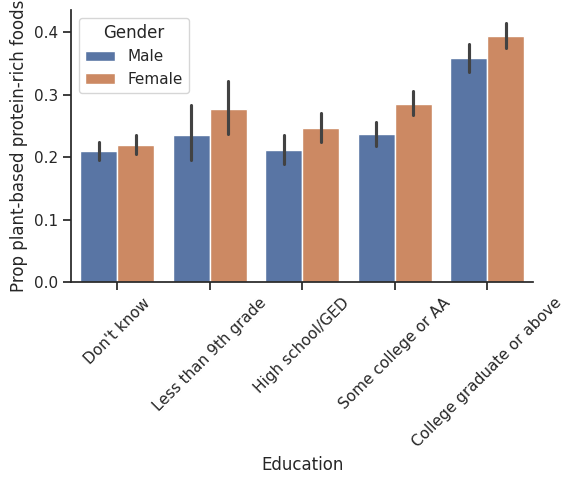

In [ ]:
# prop pbp consumption by gender
ax = sns.barplot(
  data=df,
  y='prop_pbp',
  x='education',
  hue='gender',
  order=[
    "Don't know",
    'Less than 9th grade',
    'High school/GED',
    'Some college or AA',
    'College graduate or above'
  ],
  weights='weight_2d',
  errorbar=('ci', 95)
)
ax.set(
  ylabel = 'Prop plant-based protein-rich foods',
  xlabel = 'Education'
  # title = 'Proportion of protein-rich foods from plants by education'
)
ax.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot
plt.savefig('outputs/checkin_1/pbp_by_education.png')

plt.show()
# Would like to adjust names horizontally to line up better after rotation,
# but no hjust arg?

Something to double check - are there children in the NHANES survey? Splitting by education could have pretty different meanings if there are.

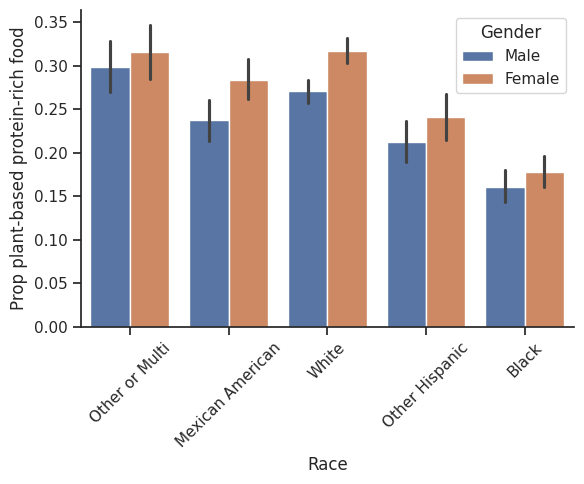

In [ ]:
# pbp consumption by race
ax = sns.barplot(
  data=df,
  y='prop_pbp',
  x='race',
  hue='gender',
  weights='weight_2d',
  errorbar=('ci', 95)
)
ax.set(
  xlabel = 'Race',
  ylabel = 'Prop plant-based protein-rich food'
  # title = 'Proportion of protein-rich food from plants by race'
)
ax.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()

# Save it
plt.savefig('outputs/checkin_1/pbp_by_race.png')

# Show it
plt.show()

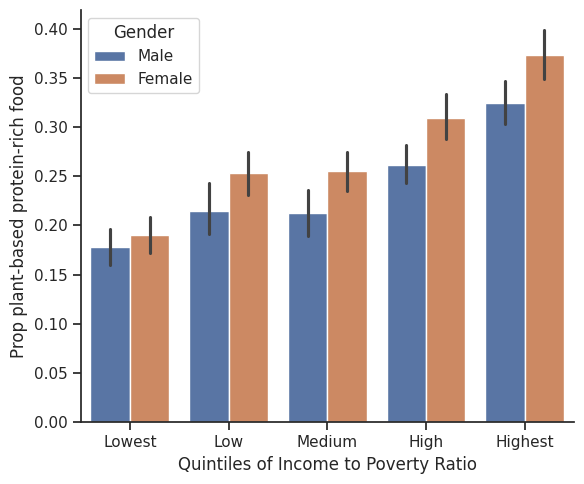

In [ ]:
# pbp consumption by poverty ratio
ax = sns.barplot(
  data = df,
  y='prop_pbp',
  x='income_ratio_qs',
  hue='gender',
  weights='weight_2d',
  errorbar=('ci', 95),
  order=[
      'Lowest',
      'Low',
      'Medium',
      'High',
      'Highest'
  ]
)
ax.set(
  xlabel = 'Quintiles of Income to Poverty Ratio',
  ylabel = 'Prop plant-based protein-rich food'
  # title = 'Proportion of protein-rich food from plants by income'
)
ax.legend(title='Gender')
plt.tight_layout()

# Save it
plt.savefig('outputs/checkin_1/pbp_by_income.png')

# Show it
plt.show()

This one is pretty interesting!

## Test a Table

Just figuring out how to make a LaTeX table

In [ ]:
# Make a smaller DF to play around with
small_df = df[['SEQN', 'weight_2d', 'gender', 'prop_pbp']].head()
print(small_df)

     SEQN  weight_2d  gender  prop_pbp
0  109263    8904.03    Male  0.242092
1  109264    3626.88  Female  0.037090
2  109265   17806.00    Male  0.004137
3  109266    2994.10  Female  0.360656
4  109269    9115.96    Male  0.000000


In [ ]:
# Rename columns to ditch underscores (which break in LaTeX)
small_df.columns = ['SEQN', 'Weight', 'Gender', 'Prop PBP']
print(small_df)

     SEQN    Weight  Gender  Prop PBP
0  109263   8904.03    Male  0.242092
1  109264   3626.88  Female  0.037090
2  109265  17806.00    Male  0.004137
3  109266   2994.10  Female  0.360656
4  109269   9115.96    Male  0.000000


In [ ]:
small_df.to_latex(
  'outputs/checkin_1/test_table.tex', # file path
  index=False, # no row numbers
  float_format="%.2f", # round to 2 digits
  label='test_table', # how we reference it in the text
  caption='This is a test table', # What it says after table number
  position='h' # h is for 'here', tries to put it immediately after the
  # reference, but it reserves some license to move it around so that it fits
)

## Summary Table

Maybe?

In [ ]:
# Lump each category - fruits, grains, proteins and fats, dairy
food_groups = df.filter(regex='^[fgpd][f_](?!.*calc$)')
categories = ['fruit', 'grain', 'protein', 'dairy']

# For each category, make a column in groups_df
# groups_df = df.loc[:, ['weight_2d', 'gender', 'age', 'race', 'education', 'income_ratio_qs']]
groups_df = df.loc[:, ['weight_2d']]

for cat in categories:
  initial = cat[0]
  cols = food_groups.columns[food_groups.columns.str.startswith(initial)]
  groups_df[cat] = food_groups[cols].sum(axis=1)

groups_df.head()

,weight_2d,fruit,grain,protein,dairy
0,8904.03,3.20,31.98,22.58,6.92
1,3626.88,0.00,39.70,41.08,6.47
2,17806.00,4.56,21.44,28.72,7.60
3,2994.10,1.74,22.30,5.64,8.30
4,9115.96,0.08,26.78,5.12,6.55


In [ ]:
data = sm.add_constant(groups_df['weight_2d'])

for cat in categories:
  desc_stats = sm.stats.DescrStatsW(groups_df[cat], weights=df['weight_2d'])
  print(f'{cat} mean: {desc_stats.mean.round(3)}')
  print(f'{cat} std: {desc_stats.std.round(3)}')

fruit mean: 2.931
fruit std: 3.236
grain mean: 29.411
grain std: 15.555
protein mean: 30.836
protein std: 19.846
dairy mean: 5.897
dairy std: 5.225


In [ ]:
memory_usage = df.memory_usage(deep=True).sum()
memory_usage_mb = memory_usage / (1024 ** 2)
print(memory_usage_mb)

13.075742721557617


In [ ]:
df.isnull().mean()

,0
SEQN,0.000000
weight_2d,0.000000
grams,0.000000
f_total_(cup_eq),0.000000
f_citmlb_(cup_eq),0.000000
f_other_(cup_eq),0.000000
f_juice_(cup_eq),0.000000
v_total_(cup_eq),0.000000
v_drkgr_(cup_eq),0.000000
v_redor_total_(cup_eq),0.000000


/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='age', ylabel='Count'>

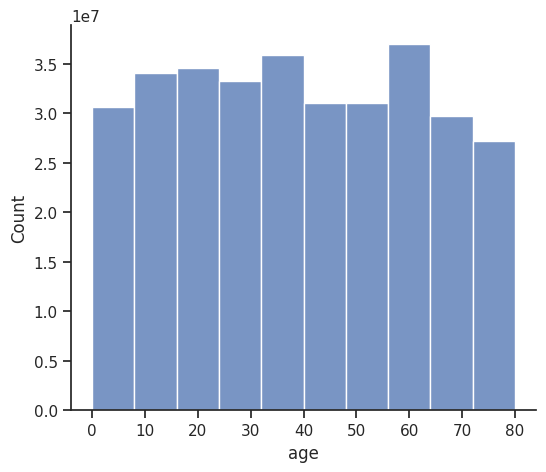

In [ ]:
sns.histplot(
    data=df,
    x='age',
    weights='weight_2d'
)

## FPED Food Groups

Exploring distributions, correlations and PCA to check for shenanigans before clustering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19386 entries, 0 to 19385
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       19386 non-null  int64  
 1   weight_2d                  19386 non-null  float64
 2   grams                      19386 non-null  float64
 3   f_total_(cup_eq)           19386 non-null  float64
 4   f_citmlb_(cup_eq)          19386 non-null  float64
 5   f_other_(cup_eq)           19386 non-null  float64
 6   f_juice_(cup_eq)           19386 non-null  float64
 7   v_total_(cup_eq)           19386 non-null  float64
 8   v_drkgr_(cup_eq)           19386 non-null  float64
 9   v_redor_total_(cup_eq)     19386 non-null  float64
 10  v_redor_tomato_(cup_eq)    19386 non-null  float64
 11  v_redor_other_(cup_eq)     19386 non-null  float64
 12  v_starchy_total_(cup_eq)   19386 non-null  float64
 13  v_starchy_potato_(cup_eq)  19386 non-null  flo

In [ ]:
# Keep only FPED food group variables
# Also remove totals, and meat, which is a subtotal
foodgroups = df.loc[:, 'f_total_(cup_eq)':'a_drinks_(no._of_drinks)']
foodgroups = foodgroups.loc[:, ~foodgroups.columns.str.contains('total|meat', case=False)]
foodgroups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19386 entries, 0 to 19385
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   f_citmlb_(cup_eq)          19386 non-null  float64
 1   f_other_(cup_eq)           19386 non-null  float64
 2   f_juice_(cup_eq)           19386 non-null  float64
 3   v_drkgr_(cup_eq)           19386 non-null  float64
 4   v_redor_tomato_(cup_eq)    19386 non-null  float64
 5   v_redor_other_(cup_eq)     19386 non-null  float64
 6   v_starchy_potato_(cup_eq)  19386 non-null  float64
 7   v_starchy_other_(cup_eq)   19386 non-null  float64
 8   v_other_(cup_eq)           19386 non-null  float64
 9   v_legumes_(cup_eq)         19386 non-null  float64
 10  g_whole_(oz_eq)            19386 non-null  float64
 11  g_refined_(oz_eq)          19386 non-null  float64
 12  pf_organ_(oz_eq)           19386 non-null  float64
 13  pf_poult_(oz_eq)           19386 non-null  flo

### Univariate Distributions

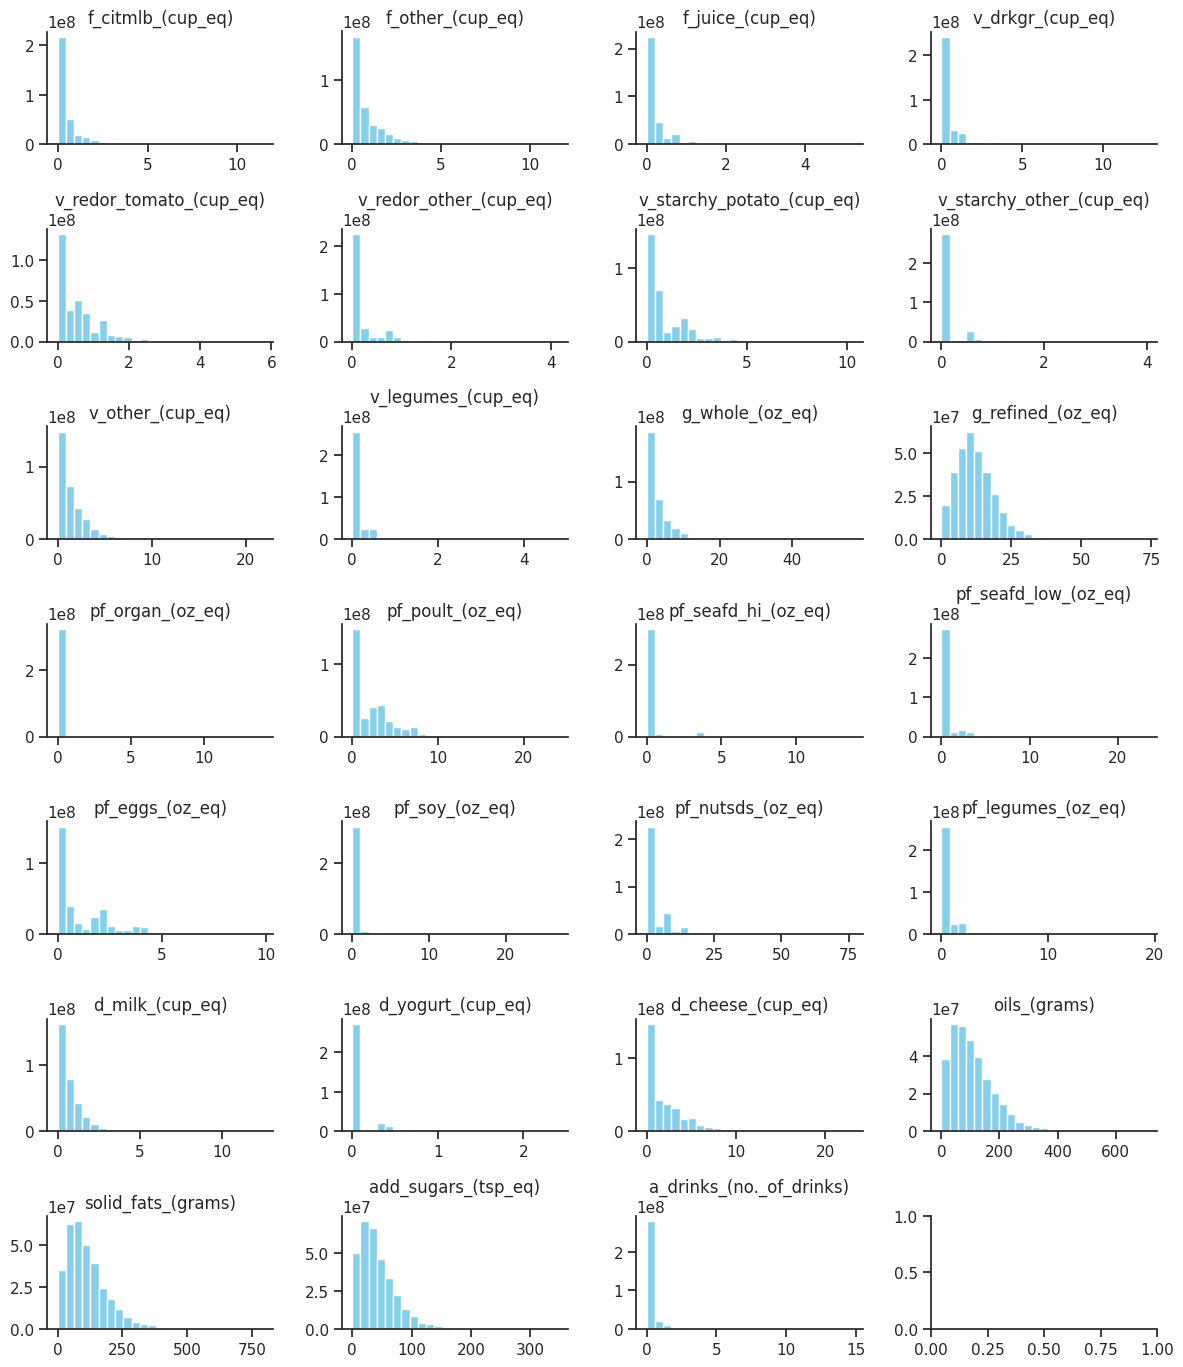

In [ ]:
cols = 4
rows = 7

fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 2 * rows))
axes = axes.flatten()

for i in np.arange(0, len(foodgroups.columns)):
    data = foodgroups.iloc[:, i],
    axes[i].hist(foodgroups.iloc[:, i], bins=25, color='skyblue', weights = df['weight_2d'])
    axes[i].set_title(f'{foodgroups.columns[i]}')

plt.tight_layout()
plt.show()

Pretty interesting! Every variables has tons of zeroes. This might mean more support for aggregating FPED categories. Also, oils, solid fats, and added sugars look different than everything else. I mean they're in grams and tsps at the very least. Wonder if they are double counting though. Looks like no one ate many organs, too.

### Correlation Matrix

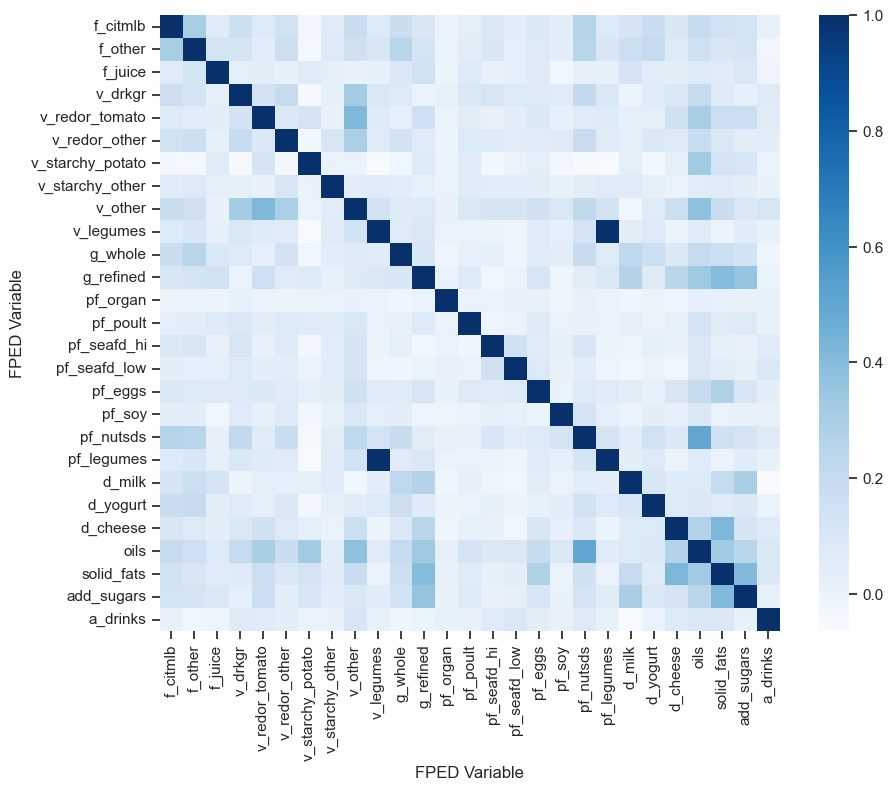

In [ ]:
# New copy of foodgroups
cor_dat = foodgroups.copy()

# Clean up column names
cor_dat.columns = cor_dat.columns.str.extract('^(.*)_\\(')[0]

# Correlation matrix
matrix = cor_dat.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    matrix,
    cmap='Blues',
    annot=False
  )
plt.xlabel('FPED Variable')
plt.ylabel('FPED Variable')
plt.show()

Looks like there is a perfect correlation between v_legumes and pf_legumes. Most everything else is near 0, some around 0.5 or 0.6

Also looks like pf_organ correlates with nothing at all. I wonder if it is all zeroes. Check this:

In [ ]:
print(f"Prop of pf_organ > 0: {np.mean(foodgroups['pf_organ_(oz_eq)'] > 0)}")
print(f"Prop of pf_soy > 0: {np.mean(foodgroups['pf_organ_(oz_eq)'] > 0)}")

Prop of pf_organ > 0: 0.010058805323429279
Prop of pf_soy > 0: 0.010058805323429279


About 1% of responses are > 0. So this is a near zero variance feature that we might consider removing.

### Scaling and PCA

In [ ]:
# initialize the StandardScaler
scaler = StandardScaler()

# apply StandardScaler to the
foodgroups_scaled = scaler.fit_transform(foodgroups)

Run PCA to turn variables into smaller set of orthogonal components. Let's do it with just 5 comonents so it's reasonably interpretable

In [ ]:
pca = PCA(n_components=5)
pca.fit(foodgroups_scaled)

PCA(n_components=5)

First check out the eigenvalues, standardized variance that each component represents

In [ ]:
# Summary table
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

summary = pd.DataFrame({
    'Eigenvalue': explained_variance,
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': explained_variance_ratio.cumsum()
}, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(summary)

     Eigenvalue  Explained Variance Ratio  Cumulative Variance
PC1    3.645468                  0.135010             0.135010
PC2    2.033459                  0.075309             0.210320
PC3    1.736431                  0.064309             0.274629
PC4    1.564634                  0.057946             0.332575
PC5    1.170512                  0.043350             0.375925


Our highest eigenvalue is 3.645, and just goes down from there. This means that the first component brings 3.645 variables worth of variance. That is not terribly impressive considering how many variables we have.

Now a printout of loadings. Loadings show much each variable contributes to the component. Large positive numbers mean strong positive association. 0 is no association

In [ ]:
# Eigenvalues
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Loadings table
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=foodgroups.columns
)

styled_loadings = loadings.style.background_gradient(
    cmap='coolwarm', axis=None, vmin=-1, vmax=1
).format("{:.2f}")

styled_loadings

,PC1,PC2,PC3,PC4,PC5
f_citmlb_(cup_eq),0.23,0.05,-0.09,0.30,-0.03
f_other_(cup_eq),0.23,0.08,-0.02,0.39,0.06
f_juice_(cup_eq),0.10,-0.05,0.13,0.11,0.33
v_drkgr_(cup_eq),0.19,0.12,-0.30,-0.01,-0.01
v_redor_tomato_(cup_eq),0.22,-0.05,-0.10,-0.32,-0.13
v_redor_other_(cup_eq),0.19,0.08,-0.23,0.09,0.01
v_starchy_potato_(cup_eq),0.07,-0.22,0.07,-0.26,0.01
v_starchy_other_(cup_eq),0.08,0.05,-0.02,0.08,0.37
v_other_(cup_eq),0.28,0.08,-0.32,-0.21,-0.08
v_legumes_(cup_eq),0.17,0.58,0.29,-0.19,0.02


This is totally arbitrary, but as a general rule, loadings over 0.34 are considered meaningful (Tabachnick and Fidell, 2013?). So, most of these are quite small.

PC1 is heavily influenced by oils, fats, sugars, but also v_other? That's rather odd. PC2 has huge loadings from legumes. It looks like both legumes variables are identical - they might be collinear because they are counting a certain proportion of the same consumption in both categories. PC3 is refined grains, milk, sugars? PC4 is fruit and whole grains, with some dairy. PC5 seafood and starches. None of this really makes much sense to me.

Let's check the correlation beteen v legumes and pf legumes:

In [ ]:
pf = foodgroups['pf_legumes_(oz_eq)']
v = foodgroups['v_legumes_(cup_eq)']
print(f'Legumes:\n {np.corrcoef(pf, v)}\n')

Legumes:
 [[1.         0.99997545]
 [0.99997545 1.        ]]



Holy moly, we have perfect collinearity with v legumes and pf legumes. Makes sense because it's from the same food. We have to remove one of these, or maybe put them together?

## Biomarkers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19386 entries, 0 to 19385
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       19386 non-null  int64  
 1   weight_2d                  19386 non-null  float64
 2   grams                      19386 non-null  float64
 3   f_total_(cup_eq)           19386 non-null  float64
 4   f_citmlb_(cup_eq)          19386 non-null  float64
 5   f_other_(cup_eq)           19386 non-null  float64
 6   f_juice_(cup_eq)           19386 non-null  float64
 7   v_total_(cup_eq)           19386 non-null  float64
 8   v_drkgr_(cup_eq)           19386 non-null  float64
 9   v_redor_total_(cup_eq)     19386 non-null  float64
 10  v_redor_tomato_(cup_eq)    19386 non-null  float64
 11  v_redor_other_(cup_eq)     19386 non-null  float64
 12  v_starchy_total_(cup_eq)   19386 non-null  float64
 13  v_starchy_potato_(cup_eq)  19386 non-null  flo

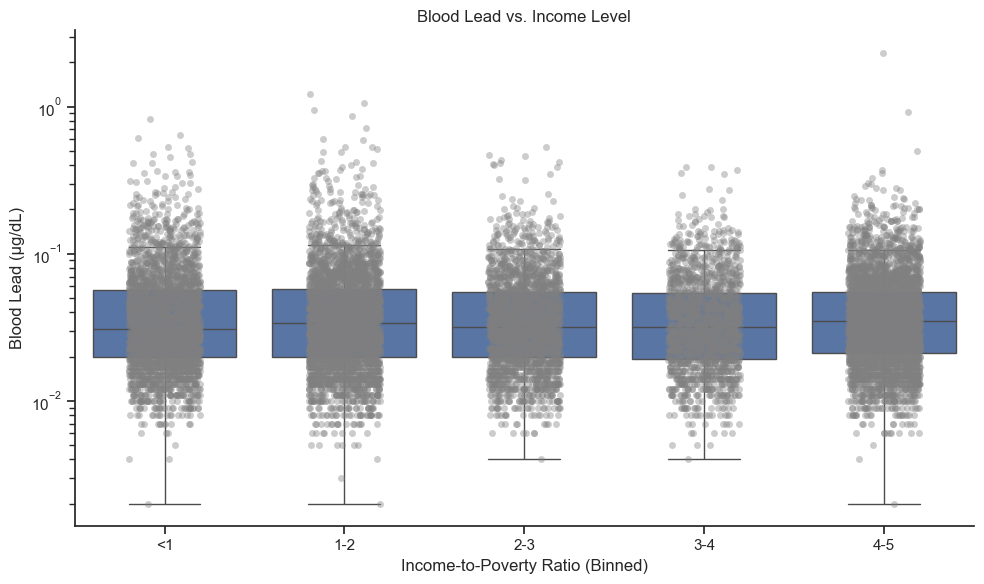

In [ ]:
# Plotting df_biomarkers

# Drop NAs
df_plot = df[['income_ratio', 'blood_lead']].dropna()

#  Bin the income ratios
df_plot['income_bin'] = pd.cut(
    df_plot['income_ratio'],
    bins=[0, 1, 2, 3, 4, 5],
    labels=['<1', '1-2', '2-3', '3-4', '4-5']
)

#  Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x='income_bin', y='blood_lead', showfliers=False)
sns.stripplot(data=df_plot, x='income_bin', y='blood_lead', color='gray', alpha=0.4, jitter=0.2)
plt.yscale('log')  # optional if the data is skewed
plt.xlabel('Income-to-Poverty Ratio (Binned)')
plt.ylabel('Blood Lead (µg/dL)')
plt.title('Blood Lead vs. Income Level')
plt.tight_layout()
plt.show()




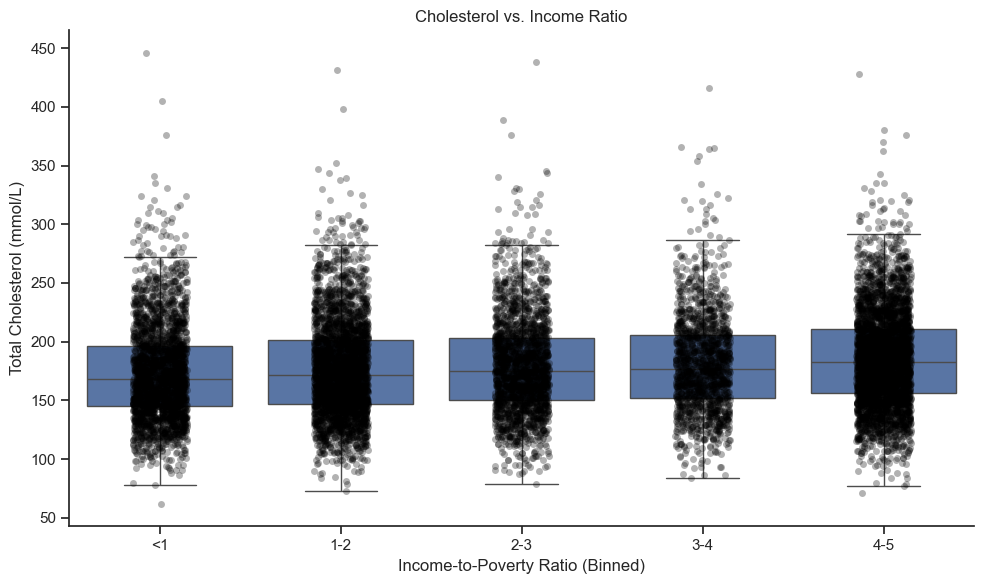

In [ ]:
# Lets try cholesterol versus income ratio

# Clean and prep
df_plot = df[['income_ratio', 'total_cholesterol']].dropna()

# Bin income for grouped boxplot
df_plot['income_bin'] = pd.cut(
    df_plot['income_ratio'],
    bins=[0, 1, 2, 3, 4, 5],
    labels=['<1', '1-2', '2-3', '3-4', '4-5']
)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x='income_bin', y='total_cholesterol', showfliers=False)
sns.stripplot(data=df_plot, x='income_bin', y='total_cholesterol', color='black', alpha=0.3, jitter=0.15)
plt.xlabel('Income-to-Poverty Ratio (Binned)')
plt.ylabel('Total Cholesterol (mmol/L)')
plt.title('Cholesterol vs. Income Ratio')
plt.tight_layout()
plt.savefig("outputs/checkin_2/cholesterol_vs_income.png", dpi=300)
plt.show()


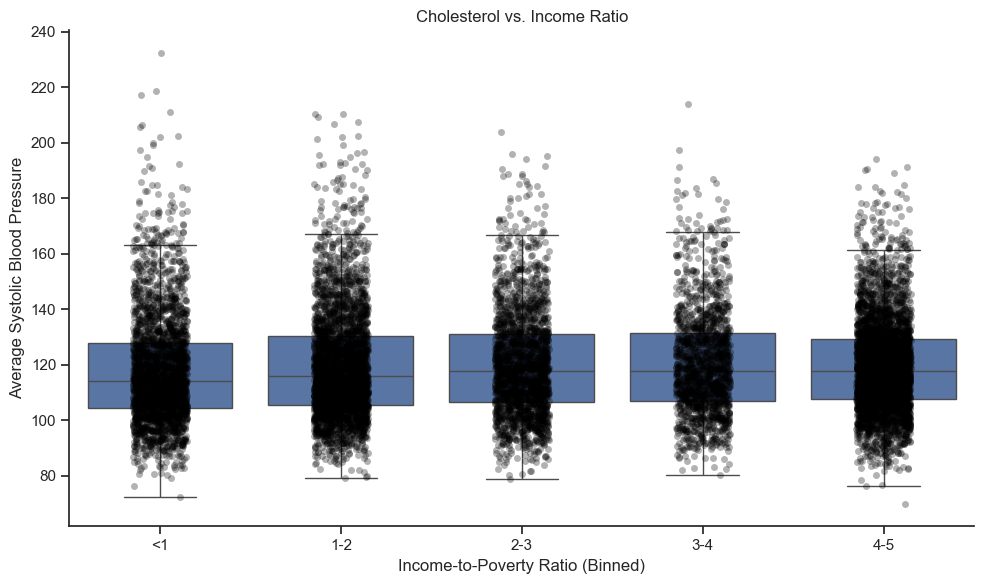

In [ ]:
# Weighted Cholesterol vs Income ratio
# Lets see blood pressure vs. binned income

# Clean and prep
df_plot = df[['income_ratio', 'avg_systolic_bp']].dropna()

# Bin income for grouped boxplot
df_plot['income_bin'] = pd.cut(
    df_plot['income_ratio'],
    bins=[0, 1, 2, 3, 4, 5],
    labels=['<1', '1-2', '2-3', '3-4', '4-5']
)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x='income_bin', y='avg_systolic_bp', showfliers=False)
sns.stripplot(data=df_plot, x='income_bin', y='avg_systolic_bp', color='black', alpha=0.3, jitter=0.15)
plt.xlabel('Income-to-Poverty Ratio (Binned)')
plt.ylabel('Average Systolic Blood Pressure')
plt.title('Cholesterol vs. Income Ratio')
plt.tight_layout()
plt.show()
#plt.savefig("outputs/checkin_2/systolic_bp_vs_income.pdf", format='pdf', bbox_inches='tight')


C:\Users\d1033\AppData\Local\Temp\ipykernel_9976\4253106025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race', y='blood_lead', data=df, palette='Blues', weights='weight_2d')


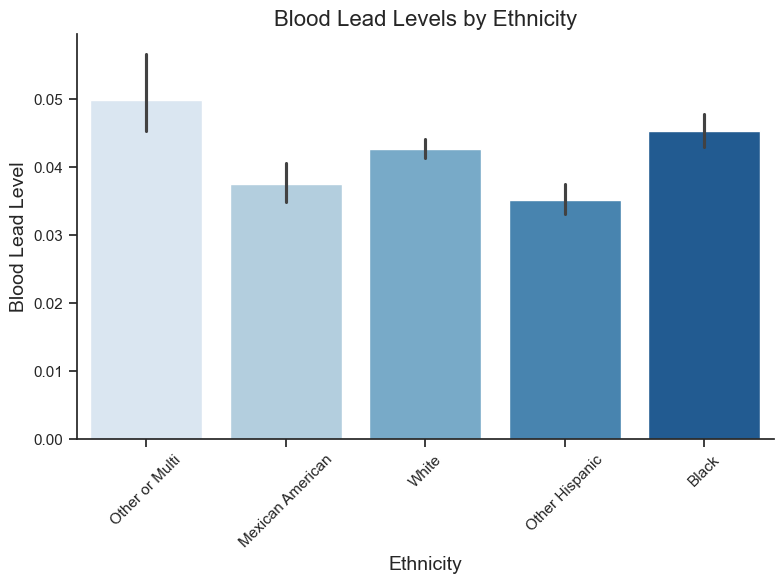

In [ ]:
#Lets graph ethnicity w/ biomarkers

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
sns.barplot(x='race', y='blood_lead', data=df, palette='Blues', weights='weight_2d')

# Add labels and title
plt.title('Blood Lead Levels by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Blood Lead Level', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust the plot to fit labels
plt.savefig("outputs/checkin_2/blood_lead_vs_ethnicity.png", dpi=300)
plt.show()




C:\Users\d1033\AppData\Local\Temp\ipykernel_9976\1264297453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race', y='blood_cadmium', data=df, palette='Blues', weights='weight_2d')


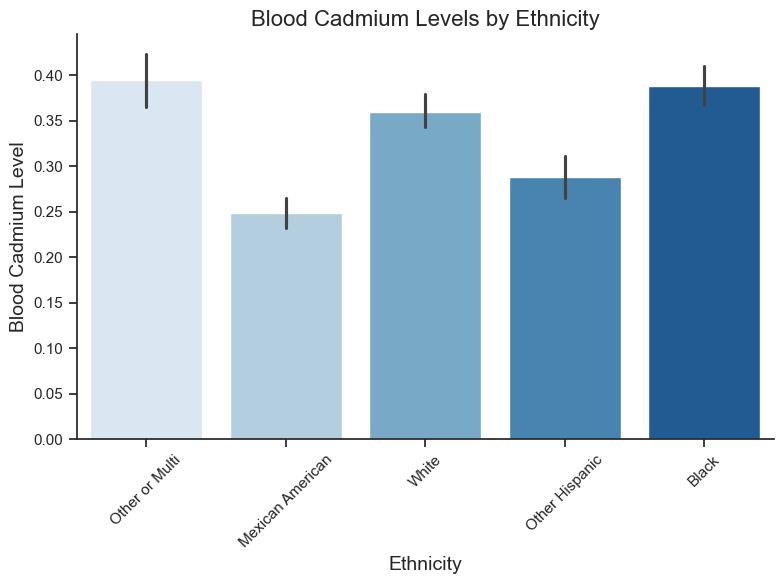

<Figure size 600x500 with 0 Axes>

In [ ]:
#Blood cadmium vs ethnicity

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
sns.barplot(x='race', y='blood_cadmium', data=df, palette='Blues', weights='weight_2d')

# Add labels and title
plt.title('Blood Cadmium Levels by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Blood Cadmium Level', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust the plot to fit labels
plt.show()
plt.savefig("outputs/checkin_2/blood_cadmium_vs_ethnicity.png",dpi=300)

C:\Users\d1033\AppData\Local\Temp\ipykernel_9976\3517394896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race', y='blood_mercury', data=df, palette='Blues', weights='weight_2d')


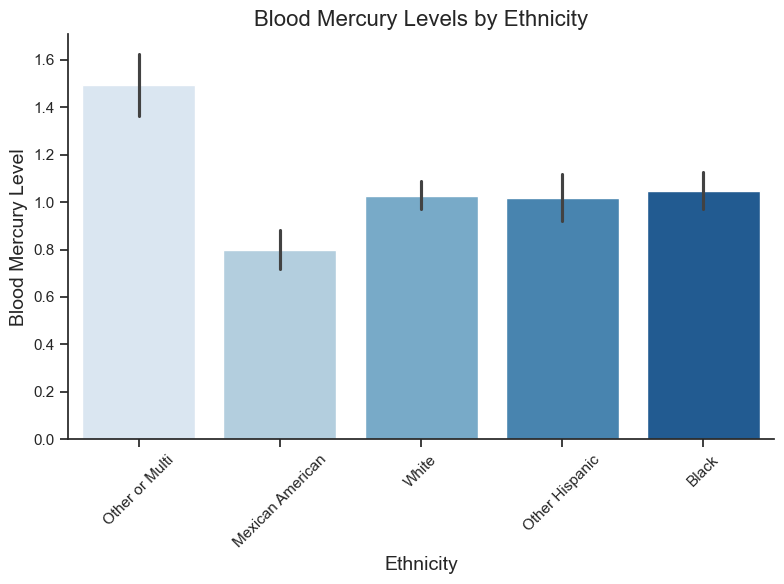

In [ ]:
#Blood Mercury vs Ethnicity

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
sns.barplot(x='race', y='blood_mercury', data=df, palette='Blues', weights='weight_2d')

# Add labels and title
plt.title('Blood Mercury Levels by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Blood Mercury Level', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust the plot to fit labels
plt.savefig("outputs/checkin_2/blood_mercury_vs_ethnicity.png", dpi=300)
plt.show()

C:\Users\d1033\AppData\Local\Temp\ipykernel_9976\636261845.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='race', y='blood_mercury', data=df, palette='viridis', ci=None, weights='weight_2d')
C:\Users\d1033\AppData\Local\Temp\ipykernel_9976\636261845.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race', y='blood_mercury', data=df, palette='viridis', ci=None, weights='weight_2d')
C:\Users\d1033\AppData\Local\Temp\ipykernel_9976\636261845.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race', data=df, palette='viridis')


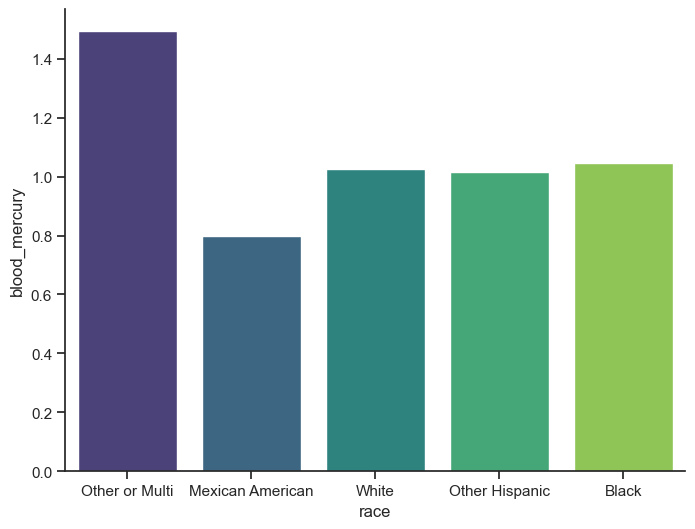

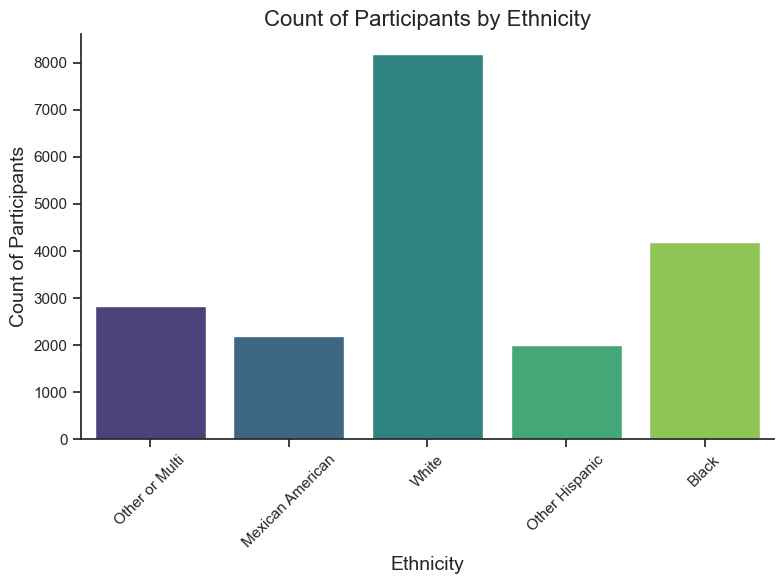

In [ ]:
# Lets provide counts for each category

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the barplot with the heavy metal levels vs ethnicity
sns.barplot(x='race', y='blood_mercury', data=df, palette='viridis', ci=None, weights='weight_2d')

# Display the count of participants in each category using countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=df, palette='viridis')

# Add labels and title
plt.title('Count of Participants by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Count of Participants', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust the plot to fit labels
plt.show()


In [ ]:
# Lets be more targetted - calculate variance for each column to graph exciting stuff
df_num = df[['blood_lead','blood_mercury','blood_cadmium','total_cholesterol','avg_systolic_bp','glycohemoglobin','blood_manganese','blood_selenium']]
df_num.var()

blood_lead              0.002727
blood_mercury           3.683883
blood_cadmium           0.228852
total_cholesterol    1702.303092
avg_systolic_bp       352.639839
glycohemoglobin         1.122682
blood_manganese        13.400544
blood_selenium        772.983143
dtype: float64

C:\Users\d1033\AppData\Local\Temp\ipykernel_9976\3242986685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race', y='blood_selenium', data=df, palette='Blues', weights='weight_2d')


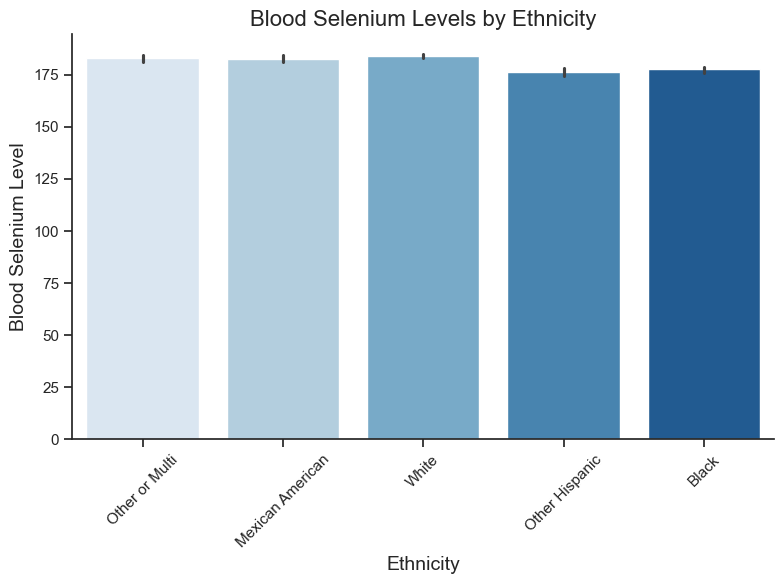

In [ ]:
#Blood Selenium vs Ethnicity
#note selenium is healthy
# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
sns.barplot(x='race', y='blood_selenium', data=df, palette='Blues', weights='weight_2d')

# Add labels and title
plt.title('Blood Selenium Levels by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Blood Selenium Level', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust the plot to fit labels
plt.show()
#plt.savefig("outputs/checkin_2/blood_selenium_vs_ethnicity.png", dpi=300)

C:\Users\d1033\AppData\Local\Temp\ipykernel_9976\1444801044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race', y='total_cholesterol', data=df, palette='Blues', weights='weight_2d')


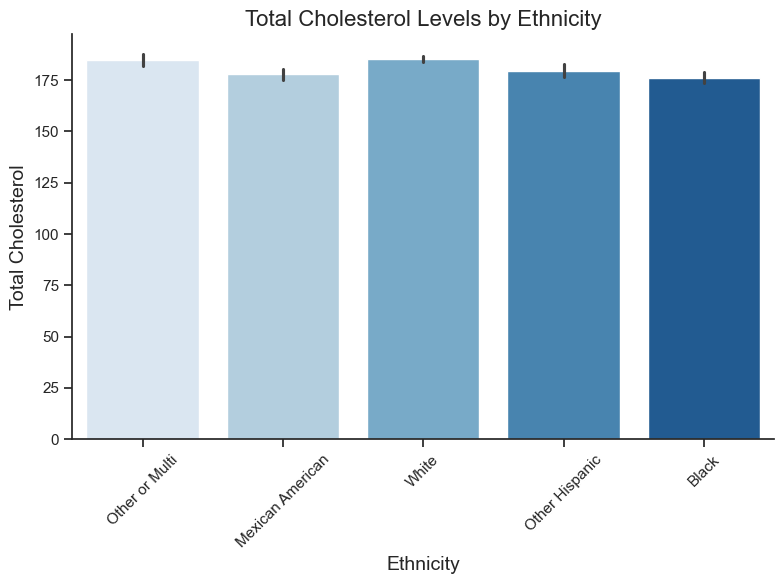

In [ ]:
#Total Cholesterol vs Ethnicity

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
sns.barplot(x='race', y='total_cholesterol', data=df, palette='Blues', weights='weight_2d')

# Add labels and title
plt.title('Total Cholesterol Levels by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Total Cholesterol', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust the plot to fit labels
plt.savefig("outputs/checkin_2/total_cholesterol_vs_ethnicity.png", dpi=300)
plt.show()